In [5]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures

In [6]:
import pandas as pd

In [88]:
data=pd.read_csv(r"https://docs.google.com/spreadsheets/d/e/2PACX-1vTFjCVDLqiuL3qs9NeFXBEyvJqPRA9ydlT2IYZDmSI2QNjKBO7EkSbWqNGi0FUIWWVyngm1wFHcDhKt/pub?output=csv")

In [8]:
data

,Unnamed: 0,state,location,so2,no2,rspm,spm,date,New Date,year,month
0,179282,Andhra Pradesh,Visakhapatnam,7.9,30.7,89.0,182.000000,1/1/2007,2013-01-01,2013,1
1,179283,Andhra Pradesh,Visakhapatnam,10.2,32.2,93.0,193.000000,1/1/2007,2013-01-01,2013,1
2,179285,Andhra Pradesh,Visakhapatnam,11.4,30.9,107.0,212.000000,1/1/2007,2013-01-01,2013,1
3,179344,Andhra Pradesh,Visakhapatnam,10.3,33.3,99.0,201.000000,1/1/2007,2013-01-01,2013,1
4,179369,Andhra Pradesh,Visakhapatnam,11.5,29.0,99.0,195.000000,1/1/2007,2013-01-01,2013,1
5,179370,Andhra Pradesh,Visakhapatnam,8.5,30.3,71.0,155.000000,1/1/2007,2013-01-01,2013,1
6,179371,Andhra Pradesh,Visakhapatnam,8.2,26.7,88.0,171.000000,1/2/2007,2013-01-02,2013,1
7,179372,Andhra Pradesh,Visakhapatnam,9.6,30.0,95.0,190.000000,1/2/2007,2013-01-02,2013,1
8,179373,Andhra Pradesh,Visakhapatnam,8.9,30.5,103.0,211.000000,1/2/2007,2013-01-02,2013,1
9,179374,Andhra Pradesh,Visakhapatnam,9.5,32.3,92.0,187.000000,1/2/2007,2013-01-02,2013,1


In [9]:
data.columns

Index(['Unnamed: 0', 'state', 'location', 'so2', 'no2', 'rspm', 'spm', 'date',
       'New Date', 'year', 'month'],
      dtype='object')

In [10]:
data.dropna(how='all',axis=1,inplace=True)

In [11]:
data.columns

Index(['Unnamed: 0', 'state', 'location', 'so2', 'no2', 'rspm', 'spm', 'date',
       'New Date', 'year', 'month'],
      dtype='object')

In [12]:
data.shape

(17740, 11)

In [13]:
import seaborn as sns

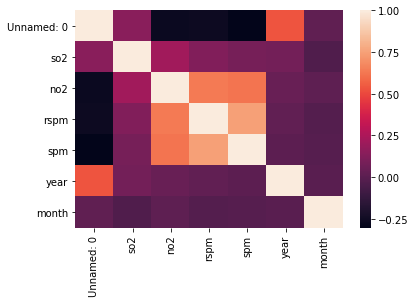

In [14]:
corrmat =data.corr()
fig, ax = plt.subplots()
#fig.set_size_inches(11,11)
sns.heatmap(corrmat)

In [15]:
data.isnull().sum()

Unnamed: 0      0
state           0
location        0
so2             0
no2             0
rspm          191
spm             0
date            0
New Date        0
year            0
month           0
dtype: int64

In [16]:
data.dtypes

Unnamed: 0      int64
state          object
location       object
so2           float64
no2           float64
rspm          float64
spm           float64
date           object
New Date       object
year            int64
month           int64
dtype: object

In [17]:
import datetime as dt

In [18]:
data['New Date']=pd.to_datetime(data['New Date'])

In [19]:
data['year']=data['New Date'].dt.year

In [20]:
data['month']=data['New Date'].dt.month

In [21]:
data

,Unnamed: 0,state,location,so2,no2,rspm,spm,date,New Date,year,month
0,179282,Andhra Pradesh,Visakhapatnam,7.9,30.7,89.0,182.000000,1/1/2007,2013-01-01,2013,1
1,179283,Andhra Pradesh,Visakhapatnam,10.2,32.2,93.0,193.000000,1/1/2007,2013-01-01,2013,1
2,179285,Andhra Pradesh,Visakhapatnam,11.4,30.9,107.0,212.000000,1/1/2007,2013-01-01,2013,1
3,179344,Andhra Pradesh,Visakhapatnam,10.3,33.3,99.0,201.000000,1/1/2007,2013-01-01,2013,1
4,179369,Andhra Pradesh,Visakhapatnam,11.5,29.0,99.0,195.000000,1/1/2007,2013-01-01,2013,1
5,179370,Andhra Pradesh,Visakhapatnam,8.5,30.3,71.0,155.000000,1/1/2007,2013-01-01,2013,1
6,179371,Andhra Pradesh,Visakhapatnam,8.2,26.7,88.0,171.000000,1/2/2007,2013-01-02,2013,1
7,179372,Andhra Pradesh,Visakhapatnam,9.6,30.0,95.0,190.000000,1/2/2007,2013-01-02,2013,1
8,179373,Andhra Pradesh,Visakhapatnam,8.9,30.5,103.0,211.000000,1/2/2007,2013-01-02,2013,1
9,179374,Andhra Pradesh,Visakhapatnam,9.5,32.3,92.0,187.000000,1/2/2007,2013-01-02,2013,1


In [22]:
data.columns

Index(['Unnamed: 0', 'state', 'location', 'so2', 'no2', 'rspm', 'spm', 'date',
       'New Date', 'year', 'month'],
      dtype='object')

In [23]:
data.location.unique

<bound method Series.unique of 0        Visakhapatnam
1        Visakhapatnam
2        Visakhapatnam
3        Visakhapatnam
4        Visakhapatnam
5        Visakhapatnam
6        Visakhapatnam
7        Visakhapatnam
8        Visakhapatnam
9        Visakhapatnam
10       Visakhapatnam
11       Visakhapatnam
12       Visakhapatnam
13       Visakhapatnam
14       Visakhapatnam
15       Visakhapatnam
16       Visakhapatnam
17       Visakhapatnam
18       Visakhapatnam
19       Visakhapatnam
20       Visakhapatnam
21       Visakhapatnam
22       Visakhapatnam
23       Visakhapatnam
24       Visakhapatnam
25       Visakhapatnam
26       Visakhapatnam
27       Visakhapatnam
28       Visakhapatnam
29       Visakhapatnam
             ...      
17710        Hyderabad
17711        Hyderabad
17712        Hyderabad
17713        Hyderabad
17714        Hyderabad
17715        Hyderabad
17716        Hyderabad
17717        Hyderabad
17718        Hyderabad
17719        Hyderabad
17720        Hyderabad
177

In [24]:
data.dtypes

Unnamed: 0             int64
state                 object
location              object
so2                  float64
no2                  float64
rspm                 float64
spm                  float64
date                  object
New Date      datetime64[ns]
year                   int64
month                  int64
dtype: object

In [25]:
datav=data[data['location']=='Visakhapatnam']

In [26]:
datav['so2'].fillna(value=datav['so2'].mean(), inplace=True)
datav['no2'].fillna(value=datav['no2'].mean(), inplace=True)
datav['spm'].fillna(value=datav['spm'].mean(), inplace=True)

C:\Users\KIIT\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [27]:
#datav_test=datav[data['year']==2019]
#datav_train=datav[data['year']!=2019]

In [28]:
#datav.to_csv("VIshakhapatnam.csv")

In [29]:
feature=['year','month','spm','so2']
x=datav[feature]
y=datav['no2']
#x_test=datav_test[feature]
#y_test=datav_test['no2']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22)
model=RandomForestRegressor()
model.fit(x,y)
y_pred = model.predict(x_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)
print(model.score(x_test, y_test))

4.4994774926551715
0.8646348194174943


In [30]:
from sklearn.model_selection import cross_val_score
np.std(cross_val_score(model,x_train,y_train,cv=10))

0.06850754992316145

In [31]:
feature=['year','month','spm','no2']
x=datav[feature]
y=datav['so2']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22)
model=RandomForestRegressor()
model.fit(x,y)
y_pred = model.predict(x_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)
print(model.score(x_test, y_test))

6.100596656517238
0.5939358918540684


In [32]:
from sklearn.model_selection import cross_val_score
np.std(cross_val_score(model,x_train,y_train,cv=10))

0.12167295396408148

In [33]:
feature=['year','month','no2','so2']
x=datav[feature]
y=datav['spm']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22)
model=RandomForestRegressor()
model.fit(x,y)
y_pred = model.predict(x_test)
#print(y_pred)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)
print(model.score(x_test, y_test))

17.50067553634178
0.8242518697367807


In [34]:
from sklearn.model_selection import cross_val_score
np.std(cross_val_score(model,x_train,y_train,cv=10))

0.13261306821590654

In [35]:
#bhubaneshwar

In [36]:
datav.isnull().sum()

Unnamed: 0    0
state         0
location      0
so2           0
no2           0
rspm          5
spm           0
date          0
New Date      0
year          0
month         0
dtype: int64

In [37]:
datab=data[data['location']=='Bhubaneshwar']
datab['so2'].fillna(value=datab['so2'].mean(), inplace=True)
datab['no2'].fillna(value=datab['no2'].mean(), inplace=True)
datab['spm'].fillna(value=datab['spm'].mean(), inplace=True)
#datab.to_csv("Bhubaneshwar.csv")

C:\Users\KIIT\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [38]:
feature=['year','month','spm','so2']
x=datab[feature]
y=datab['no2']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22)
model=RandomForestRegressor()
model.fit(x,y)
y_pred = model.predict(x_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)
print(model.score(x_test, y_test))

1.220005163354283
0.9094945111143425


In [39]:
from sklearn.model_selection import cross_val_score
np.std(cross_val_score(model,x_train,y_train,cv=10))

0.2223629366723837

In [40]:
feature=['year','month','spm','no2']
x=datab[feature]
y=datab['so2']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22)
model=RandomForestRegressor()
model.fit(x,y)
y_pred = model.predict(x_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)
print(model.score(x_test, y_test))

0.2658706638776485
0.8131293539253419


In [41]:
from sklearn.model_selection import cross_val_score
np.std(cross_val_score(model,x_train,y_train,cv=10))

4.081748515678548

In [42]:
feature=['year','month','no2','so2']
x=datav[feature]
y=datav['spm']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22)
model=RandomForestRegressor()
model.fit(x,y)
y_pred = model.predict(x_test)
#print(y_pred)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)
print(model.score(x_test, y_test))

17.472551016252414
0.824816289105926


In [43]:
from sklearn.model_selection import cross_val_score
np.std(cross_val_score(model,x_train,y_train,cv=10))

0.12434031750176798

In [44]:
#Navi Mumbai

In [45]:
datam=data[data['location']=='Navi Mumbai']
datam['so2'].fillna(value=datam['so2'].mean(), inplace=True)
datam['no2'].fillna(value=datam['no2'].mean(), inplace=True)
datam['spm'].fillna(value=datam['spm'].mean(), inplace=True)
#datam.to_csv("Mumbai.csv")

C:\Users\KIIT\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [46]:
feature=['year','month','spm','so2']
x=datam[feature]
y=datam['no2']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22)
model=RandomForestRegressor()
model.fit(x,y)
y_pred = model.predict(x_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)
print(model.score(x_test, y_test))

5.799548997509007
0.8594863472541784


In [47]:
from sklearn.model_selection import cross_val_score
np.std(cross_val_score(model,x_train,y_train,cv=10))

0.08030703944222577

In [48]:
feature=['year','month','spm','no2']
x=datam[feature]
y=datam['so2']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22)
model=RandomForestRegressor()
model.fit(x,y)
y_pred = model.predict(x_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)
print(model.score(x_test, y_test))

4.9286891963079436
0.8323081988447856


In [49]:
from sklearn.model_selection import cross_val_score
np.std(cross_val_score(model,x_train,y_train,cv=10))

0.07953162803927911

In [50]:
feature=['year','month','no2','so2']
x=datav[feature]
y=datav['spm']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22)
model=RandomForestRegressor()
model.fit(x,y)
y_pred = model.predict(x_test)
#print(y_pred)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)
print(model.score(x_test, y_test))

17.87983540045121
0.8165540533714039


In [51]:
from sklearn.model_selection import cross_val_score
np.std(cross_val_score(model,x_train,y_train,cv=10))

0.15596644550575564

In [52]:
#hyderabad

In [53]:
datah=data[data['location']=='Hyderabad']
datah['so2'].fillna(value=datah['so2'].mean(), inplace=True)
datah['no2'].fillna(value=datah['no2'].mean(), inplace=True)
datah['spm'].fillna(value=datah['spm'].mean(), inplace=True)
#datah.to_csv("hyd.csv")

C:\Users\KIIT\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [54]:
feature=['year','month','spm','so2']
x=datah[feature]
y=datah['no2']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22)
model=RandomForestRegressor()
model.fit(x,y)
y_pred = model.predict(x_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)
print(model.score(x_test, y_test))

7.321624812153076
0.6901108235926808


In [55]:
from sklearn.model_selection import cross_val_score
np.std(cross_val_score(model,x_train,y_train,cv=10))

0.08325541953257906

In [56]:
feature=['year','month','spm','no2']
x=datah[feature]
y=datah['so2']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22)
model=RandomForestRegressor()
model.fit(x,y)
y_pred = model.predict(x_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)
print(model.score(x_test, y_test))

1.1267816398754016
0.48305371246502965


In [57]:
from sklearn.model_selection import cross_val_score
np.std(cross_val_score(model,x_train,y_train,cv=10))

0.7875640050636474

In [58]:
feature=['year','month','no2','so2']
x=datah[feature]
y=datah['spm']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22)
model=RandomForestRegressor()
model.fit(x,y)
y_pred = model.predict(x_test)
#print(y_pred)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)
print(model.score(x_test, y_test))

21.587240042055125
0.9044048062554669


In [59]:
from sklearn.model_selection import cross_val_score
np.std(cross_val_score(model,x_train,y_train,cv=10))

0.03804974681843178

In [60]:
#delhi

In [61]:
datad=data[data['location']=='Delhi']
datad['so2'].fillna(value=datad['so2'].mean(), inplace=True)
datad['no2'].fillna(value=datad['no2'].mean(), inplace=True)
datad['spm'].fillna(value=datad['spm'].mean(), inplace=True)

C:\Users\KIIT\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [62]:
feature=['year','month','spm','so2']
x=datad[feature]
y=datad['no2']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22)
model=RandomForestRegressor()
model.fit(x,y)
y_pred = model.predict(x_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)
print(model.score(x_test, y_test))

10.5898574471188
0.8524009708596055


In [63]:
from sklearn.model_selection import cross_val_score
np.std(cross_val_score(model,x_train,y_train,cv=10))

0.05202418446477315

In [64]:
feature=['year','month','spm','no2']
x=datad[feature]
y=datad['so2']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22)
model=RandomForestRegressor()
model.fit(x,y)
y_pred = model.predict(x_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)
print(model.score(x_test, y_test))

1.9458680482394988
0.8497053259777854


In [65]:
from sklearn.model_selection import cross_val_score
np.std(cross_val_score(model,x_train,y_train,cv=10))

0.22056071058377089

In [66]:
feature=['year','month','no2','so2']
x=datad[feature]
y=datad['spm']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22)
model=RandomForestRegressor()
model.fit(x,y)
y_pred = model.predict(x_test)
#print(y_pred)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)
print(model.score(x_test, y_test))

48.28007927755107
0.8937423876446606


In [67]:
from sklearn.model_selection import cross_val_score
np.std(cross_val_score(model,x_train,y_train,cv=10))

0.07906265670899316

In [68]:
#khatam code

In [69]:
#datafinal= pd.concat([datav, datad,datab,datam,datah])

In [70]:
#datafinal

In [71]:
#datafinal.to_csv("pollution.csv")

In [72]:
#datafinal.shape

In [73]:
#datafinal.isnull().sum()

In [74]:
#w=datafinal.groupby(['location','year']).so2.mean()
#datafinal['so2_mean'] = datafinal(['location','year']).apply(w.get)

In [75]:
#datafinal['so2'].fillna(value=datafinal['so2'].mean(), inplace=True)

In [76]:
#datafinal['spm'].fillna(value=datafinal['spm'].mean(), inplace=True)

In [77]:
#datafinal['no2'].fillna(value=datafinal['no2'].mean(), inplace=True)

In [78]:
#datafinal

In [79]:
#datafinal.location.unique

In [80]:
#datafinal.isnull().sum()

In [81]:
#def fun(num):
#    if num=='Visakhapatnam':
#    if num=='Delhi':
#        return 11
#    if num=='Hyderabad':
#        return 40
#    if num=='Navi Mumbai':
#        return 22
#    if num=='Bhubaneshwar':
#        return 674

In [82]:
#datafinal['Unique code']=(datafinal['location']).apply(fun)

In [83]:
#datafinal

In [84]:
#feature=['year','month','spm','no2']
#x=datafinal[feature]
#y=datafinal['so2']
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22)
#model=LinearRegression()
#model.fit(x,y)
#y_pred = model.predict(x_test)
#rms = np.sqrt(mean_squared_error(y_test, y_pred))
#print(rms)
#print(model.score(x_test, y_test))
#print(model.coef_)
#print(model.intercept_)

In [85]:
#feature=['year','month','spm','so2']
#x=datafinal[feature]
#y=datafinal['no2']
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22)
#model=RandomForestRegressor()
#model.fit(x,y)
#y_pred = model.predict(x_test)
#rms = np.sqrt(mean_squared_error(y_test, y_pred))
#print(rms)
#print(model.score(x_test, y_test))

In [86]:
#feature=['so2','no2','year','month']
#x=datafinal[feature]
#y=datafinal['spm']
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22)
#model=RandomForestRegressor()
#model.fit(x,y)
#y_pred = model.predict(x_test)

In [87]:
#rms = np.sqrt(mean_squared_error(y_test, y_pred))
#print(rms)
#print(model.score(x_test, y_test))